## 환경설정

In [113]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [115]:
pd.set_option('display.max_columns', None)

loan_df = pd.read_csv('/content/drive/MyDrive/머신러닝 프로젝트/data/loan.csv')
loan_df.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,NaN,746,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,546,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,890,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,NaN,745.55,1,Active,715,4,Semi-Urban,1,208567.91,74008.28


In [116]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

#### 컬럼명  
Customer ID: 고객 고유 식별 번호  
Name: 고객 이름  
Gender: 성별  
Age: 나이  
Income (USD): 연 소득 (USD 기준)  
Income Stability: 소득 안정성  
Profession: 직업  
Type of Employment: 고용 형태  
Location: 거주지 위치  
Loan Amount Request (USD): 대출 요청 금액  
Current Loan Expenses (USD): 현재 대출 상환액  
Expense Type 1: 지출 유형 1  
Expense Type 2: 지출 유형 2  
Dependents: 부양 가족 수  
Credit Score: 신용 점수  
No. of Defaults: 대출 연체 횟수  
Has Active Credit Card: 활성 신용카드 보유 여부  
Property ID: 자산 고유 식별 번호  
Property Type: 자산 유형 (예: 주택, 상업용)  
Property Location: 자산 위치  
Co-Applicant: 공동 신청자 여부  
Property Price: 자산 가격  
Loan Sanction Amount (USD): 승인된 대출 금액  

In [117]:
loan_df.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,30000.000000,2.542400e+04,30000.000000,29828.000000,27507.000000,28297.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,29660.000000
mean,40.092300,2.630574e+03,88826.333855,400.936876,2.253027,739.885381,0.193933,501.934700,2.460067,-4.743867,1.317597e+05,47649.342208
std,16.045129,1.126272e+04,59536.949605,242.545375,0.951162,72.163846,0.395384,288.158086,1.118562,74.614593,9.354955e+04,48221.146686
min,18.000000,3.777000e+02,6048.240000,-999.000000,1.000000,580.000000,0.000000,1.000000,1.000000,-999.000000,-9.990000e+02,-999.000000
25%,25.000000,1.650457e+03,41177.755000,247.667500,2.000000,681.880000,0.000000,251.000000,1.000000,1.000000,6.057216e+04,0.000000
50%,40.000000,2.222435e+03,75128.075000,375.205000,2.000000,739.820000,0.000000,504.000000,2.000000,1.000000,1.099936e+05,35209.395000
75%,55.000000,3.090593e+03,119964.605000,521.292500,3.000000,799.120000,0.000000,751.000000,3.000000,1.000000,1.788807e+05,74261.250000
max,65.000000,1.777460e+06,621497.820000,3840.880000,14.000000,896.260000,1.000000,999.000000,4.000000,1.000000,1.077967e+06,481907.320000


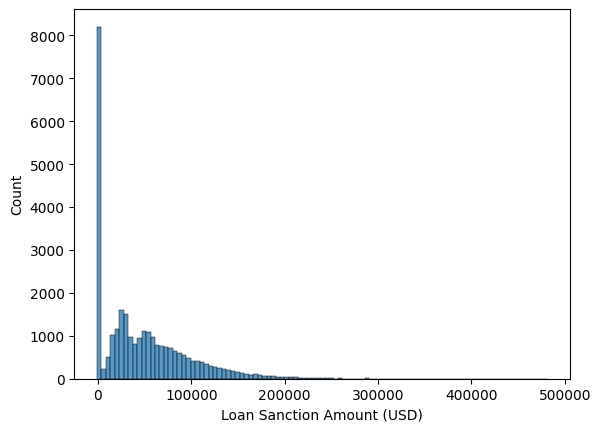

In [118]:
sns.histplot(loan_df['Loan Sanction Amount (USD)'])
plt.show()

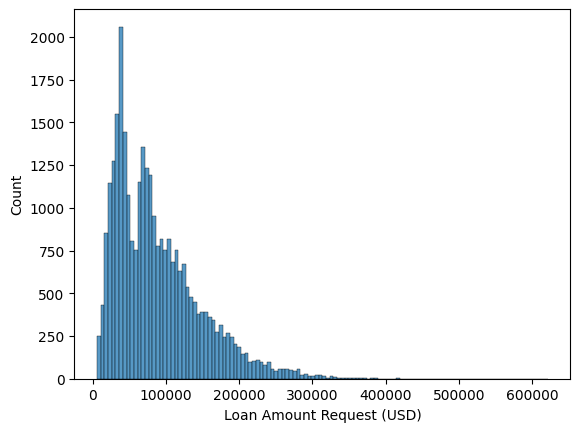

In [119]:
sns.histplot(loan_df['Loan Amount Request (USD)'])
plt.show()

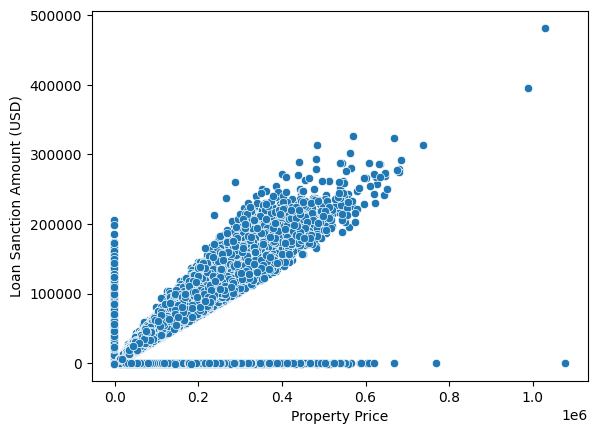

In [120]:
sns.scatterplot(x=loan_df['Property Price'], y=loan_df['Loan Sanction Amount (USD)'])
plt.show()

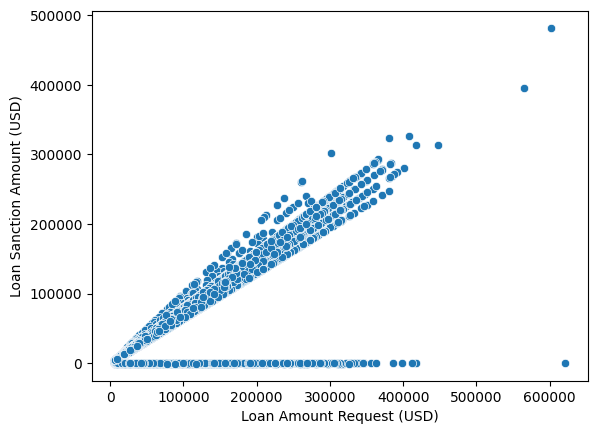

In [121]:
sns.scatterplot(x=loan_df['Loan Amount Request (USD)'], y=loan_df['Loan Sanction Amount (USD)'])
plt.show()

## 데이터 분리

In [122]:
loan_df.head(3)

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,NaN,746,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,546,2,Urban,0,72440.58,36474.43


In [123]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(loan_df, test_size=0.2, random_state=100)
print(train.shape, test.shape)

(24000, 23) (6000, 23)


In [124]:
# 필요하지 않은 컬럼 삭제
train.drop(['Customer ID', 'Name', 'Property ID'], axis = 1 , inplace=True)

## 이상 데이터 및 결측치 처리

In [125]:
# -999 태그 결측치로
train = train.replace({-999 : np.NaN})

In [126]:
train.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,24000.000000,2.035300e+04,24000.000000,23714.000000,22020.000000,22649.000000,24000.000000,24000.00000,23867.000000,2.372300e+04,23459.000000
mean,40.105917,2.652638e+03,88877.700982,409.742125,2.256403,739.831216,0.195958,2.46550,0.854737,1.332616e+05,48252.393286
std,16.049741,1.256625e+04,59809.659460,218.115770,0.953059,72.118159,0.396945,1.12069,0.352374,9.310775e+04,48338.788338
min,18.000000,3.777000e+02,6048.240000,33.760000,1.000000,580.000000,0.000000,1.00000,0.000000,7.265950e+03,0.000000
25%,25.000000,1.650080e+03,41082.130000,249.842500,2.000000,681.890000,0.000000,1.00000,1.000000,6.173096e+04,0.000000
50%,40.000000,2.220400e+03,75033.445000,376.945000,2.000000,739.710000,0.000000,2.00000,1.000000,1.110366e+05,36068.090000
75%,55.000000,3.091440e+03,119970.307500,523.962500,3.000000,799.220000,0.000000,3.00000,1.000000,1.800050e+05,74786.475000
max,65.000000,1.777460e+06,621497.820000,3419.660000,14.000000,896.260000,1.000000,4.00000,1.000000,1.077967e+06,395368.740000


In [127]:
# 결측치 비율이 0보다 큰 열만 출력
missing_data = train.isna().mean()
missing_data[missing_data > 0]

,0
Gender,0.001708
Income (USD),0.151958
Income Stability,0.056333
Type of Employment,0.242042
Current Loan Expenses (USD),0.011917
Dependents,0.082500
Credit Score,0.056292
Has Active Credit Card,0.052583
Property Location,0.011333
Co-Applicant,0.005542


### Gender

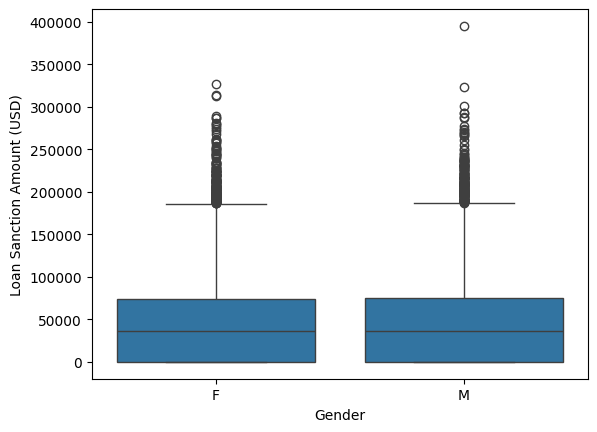

In [128]:
sns.boxplot(data=train, x='Gender', y='Loan Sanction Amount (USD)')
plt.show()

In [129]:
# Gender은 성별간 차이가 거의 없다 -> Gender 컬럼 삭제
train.drop('Gender', axis=1, inplace=True)

In [130]:
# 수입 컬럼 삭제
train = train.dropna(subset={'Income (USD)'})

### Type of Employment

In [131]:
# 고용 종류
train['Type of Employment'].value_counts()

,count
Type of Employment,
Laborers,3803
Sales staff,2541
Core staff,2206
Managers,1692
Drivers,1093
Accountants,947
High skill tech staff,897
Medicine staff,570
Security staff,392


In [132]:
# 직업
train['Profession'].value_counts()

,count
Profession,
Working,11469
Commercial associate,5452
Pensioner,1839
State servant,1589
Businessman,2
Student,1
Unemployed,1


In [133]:
# 고용 종류 결측치 확인
train[train['Type of Employment'].isna()]['Profession'].value_counts()

,count
Profession,
Pensioner,1839
Working,1771
Commercial associate,974
State servant,299
Student,1
Unemployed,1


In [134]:
# 연금 수령자 고용 종류 고윳값 확인
train[train['Profession']=='Pensioner']['Type of Employment'].unique()

array([nan], dtype=object)

In [135]:
# Pensioner은 Type of Employment가 결측값인걸 확인할 수 있다.
# Pensioner인 Type of Employment의 결측값을 Pensioner로 대체

train.loc[:, 'Type of Employment'] = train.apply(
    lambda x: 'Pensioner' if x['Profession'] == 'Pensioner' else x['Type of Employment'], axis=1
)

In [136]:
# 그 외 결측값 처리
train['Type of Employment'] = train['Type of Employment'].fillna('UnKnown')

### Income Stability

In [137]:
train['Income Stability'].value_counts()

,count
Income Stability,
Low,17619
High,1738


In [138]:
# 수입 안정성이 높은 고용 종류
train[train['Income Stability']=='High']['Type of Employment'].value_counts()

,count
Type of Employment,
Pensioner,1737
UnKnown,1


In [139]:
# Pensioner이면 High, 아니면 Low로 변환
train.loc[:, 'Income Stability'] = train['Type of Employment'].apply(lambda x : 'High' if x == 'Pensioner' else 'Low')

In [140]:
# 확인
result = train.groupby(['Profession', 'Income Stability'])['Age'].count()
result.name = 'Count'
result

,,Count
Profession,Income Stability,
Businessman,Low,2
Commercial associate,Low,5452
Pensioner,High,1839
State servant,Low,1589
Student,Low,1
Unemployed,Low,1
Working,Low,11469


In [141]:
# 결측치 비율이 0보다 큰 열만 출력
missing_data = train.isna().mean()
missing_data[missing_data > 0]

,0
Current Loan Expenses (USD),0.010170
Dependents,0.072225
Credit Score,0.049575
Has Active Credit Card,0.051835
Property Location,0.010318
Co-Applicant,0.005012
Property Price,0.010170
Loan Sanction Amount (USD),0.020243


### Current Loan Expenses (USD)

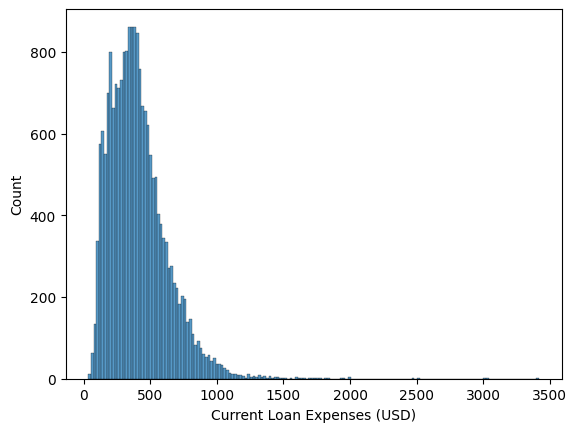

In [142]:
sns.histplot(train['Current Loan Expenses (USD)'])
plt.show()

In [143]:
np.nanmedian(train['Current Loan Expenses (USD)'])

376.045

In [144]:
# 중위값으로 결측치 대체
train['Current Loan Expenses (USD)'] = train['Current Loan Expenses (USD)'].fillna(np.nanmedian(train['Current Loan Expenses (USD)']))

### Dependents

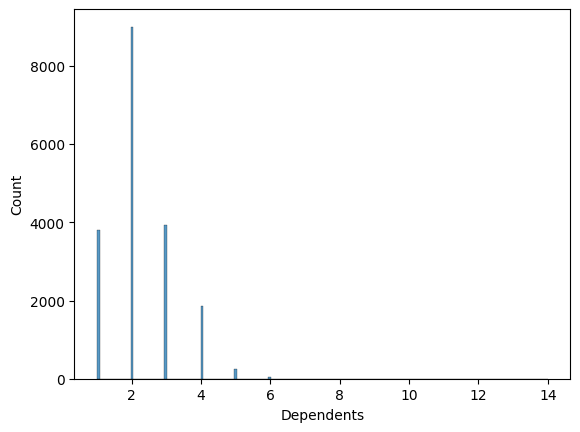

In [145]:
sns.histplot(train['Dependents'])
plt.show()

In [146]:
np.nanmedian(train['Dependents'])

2.0

In [147]:
train['Dependents'] = train['Dependents'].fillna(np.nanmedian(train['Dependents']))

### Credit Score

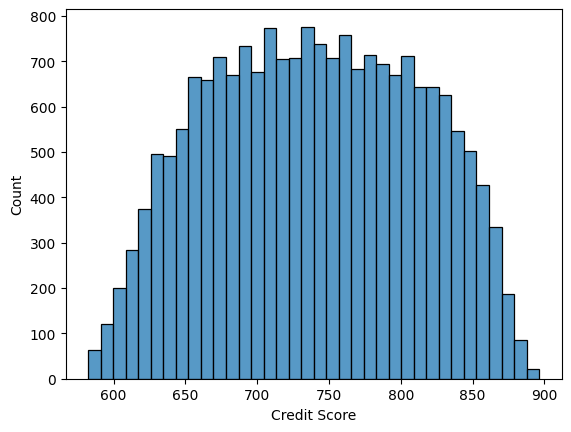

In [148]:
sns.histplot(train['Credit Score'])
plt.show()

In [149]:
np.nanmedian(train['Credit Score'])

739.585

In [150]:
train['Credit Score'] = train['Credit Score'].fillna(np.nanmedian(train['Credit Score']))

### Has Active Credit Card

In [151]:
train['Has Active Credit Card'].value_counts()

,count
Has Active Credit Card,
Active,6650
Inactive,6452
Unpossessed,6196


In [152]:
# 고르게 분포되서 UnKnow 새로운 값 생성
train['Has Active Credit Card'] = train['Has Active Credit Card'].fillna('unknown')

### Property Location

In [153]:
train['Property Location'].value_counts()

,count
Property Location,
Semi-Urban,7019
Rural,6863
Urban,6261


In [154]:
train['Property Location'] = train['Property Location'].fillna('unknown')

### Co-Applicant

In [155]:
train['Co-Applicant'].value_counts()

,count
Co-Applicant,
1.0,17063
0.0,3188


In [156]:
# 결측치 비율이 0보다 큰 열만 출력
missing_data = train.isna().mean()
missing_data[missing_data > 0]

,0
Co-Applicant,0.005012
Property Price,0.010170
Loan Sanction Amount (USD),0.020243


### Property Price

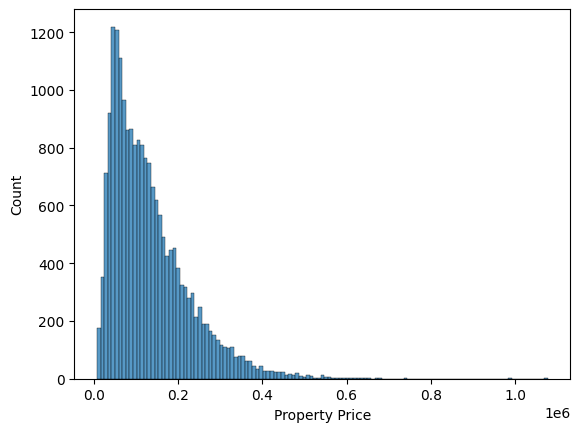

In [157]:
sns.histplot(train['Property Price'])
plt.show()

In [158]:
# 나머지 결측값 제거
train = train.dropna()

In [159]:
train.shape

(19653, 19)

In [160]:
info_dic = {'Current Loan Expenses (USD)':np.median(train['Current Loan Expenses (USD)'])}
info_dic['Dependents'] = np.median(train['Dependents'])
info_dic['Credit Score'] = np.median(train['Credit Score'])

In [161]:
info_dic

{'Current Loan Expenses (USD)': 376.045,
 'Dependents': 2.0,
 'Credit Score': 739.585}

## 피처 엔지니어링

In [162]:
# 'Loan/Income' 컬럼을 추가: 대출 금액을 소득으로 나눈 비율
train.loc[:, 'Loan/Income'] = train['Loan Sanction Amount (USD)'] / train['Income (USD)']

# 'Loan/Price' 컬럼을 추가: 대출 금액을 부동산 가격으로 나눈 비율
train.loc[:, 'Loan/Price'] = train['Loan Sanction Amount (USD)'] / train['Property Price']

In [163]:
# 'Loan/Income'과 'Loan/Price' 컬럼만 describe() 실행
train[['Loan/Income', 'Loan/Price']].describe()

,Loan/Income,Loan/Price
count,19653.000000,19653.000000
mean,19.837874,0.344171
std,20.537331,0.234726
min,0.000000,0.000000
25%,0.000000,0.000000
50%,15.890712,0.429458
75%,30.120162,0.515879
max,242.532566,0.908257


## 더미 변수

In [164]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19653 entries, 795 to 5640
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          19653 non-null  int64  
 1   Income (USD)                 19653 non-null  float64
 2   Income Stability             19653 non-null  object 
 3   Profession                   19653 non-null  object 
 4   Type of Employment           19653 non-null  object 
 5   Location                     19653 non-null  object 
 6   Loan Amount Request (USD)    19653 non-null  float64
 7   Current Loan Expenses (USD)  19653 non-null  float64
 8   Expense Type 1               19653 non-null  object 
 9   Expense Type 2               19653 non-null  object 
 10  Dependents                   19653 non-null  float64
 11  Credit Score                 19653 non-null  float64
 12  No. of Defaults              19653 non-null  int64  
 13  Has Active Credit Ca

In [165]:
train.select_dtypes('O').head(3)

,Income Stability,Profession,Type of Employment,Location,Expense Type 1,Expense Type 2,Has Active Credit Card,Property Location
795,Low,Working,High skill tech staff,Semi-Urban,N,N,Inactive,Rural
23652,Low,Working,Drivers,Semi-Urban,N,N,Unpossessed,Rural
9038,Low,Commercial associate,Core staff,Semi-Urban,N,N,Active,Semi-Urban


In [166]:
train = train.replace({'N':0, 'Y':1}).infer_objects(copy=False)

In [167]:
# Object 컬럼만
obj_list = train.select_dtypes(include='object').columns.to_list()

In [168]:
# Object 고윳값
for col in obj_list:
  print(f'{col} :',train[col].nunique())

Income Stability : 2
Profession : 7
Type of Employment : 20
Location : 3
Has Active Credit Card : 4
Property Location : 4


In [169]:
train = pd.get_dummies(train, columns=obj_list)
train.head()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD),Loan/Income,Loan/Price,Income Stability_High,Income Stability_Low,Profession_Businessman,Profession_Commercial associate,Profession_Pensioner,Profession_State servant,Profession_Student,Profession_Unemployed,Profession_Working,Type of Employment_Accountants,Type of Employment_Cleaning staff,Type of Employment_Cooking staff,Type of Employment_Core staff,Type of Employment_Drivers,Type of Employment_HR staff,Type of Employment_High skill tech staff,Type of Employment_IT staff,Type of Employment_Laborers,Type of Employment_Low-skill Laborers,Type of Employment_Managers,Type of Employment_Medicine staff,Type of Employment_Pensioner,Type of Employment_Private service staff,Type of Employment_Realty agents,Type of Employment_Sales staff,Type of Employment_Secretaries,Type of Employment_Security staff,Type of Employment_UnKnown,Type of Employment_Waiters/barmen staff,Location_Rural,Location_Semi-Urban,Location_Urban,Has Active Credit Card_Active,Has Active Credit Card_Inactive,Has Active Credit Card_Unpossessed,Has Active Credit Card_unknown,Property Location_Rural,Property Location_Semi-Urban,Property Location_Urban,Property Location_unknown
795,44,2966.95,170073.55,707.32,0,0,5.0,775.13,0,4,1.0,256182.13,127555.16,42.992015,0.497908,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False
23652,55,2689.88,90912.39,467.16,0,0,2.0,658.61,0,3,0.0,116734.95,0.00,0.000000,0.000000,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False
9038,61,2877.71,84188.52,303.05,0,0,2.0,698.94,0,1,0.0,123464.78,0.00,0.000000,0.000000,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False
11588,57,3294.48,72322.12,357.67,0,1,1.0,823.79,0,3,1.0,91893.00,57857.70,17.562013,0.629620,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False
7422,35,1561.81,91643.48,677.65,1,1,5.0,760.86,0,1,1.0,111136.85,0.00,0.000000,0.000000,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False


## 컬럼 네임 동기화

In [170]:
info_dic['cols'] = train.columns.drop('Loan Sanction Amount (USD)')
info_dic

{'Current Loan Expenses (USD)': 376.045,
 'Dependents': 2.0,
 'Credit Score': 739.585,
 'cols': Index(['Age', 'Income (USD)', 'Loan Amount Request (USD)',
        'Current Loan Expenses (USD)', 'Expense Type 1', 'Expense Type 2',
        'Dependents', 'Credit Score', 'No. of Defaults', 'Property Type',
        'Co-Applicant', 'Property Price', 'Loan/Income', 'Loan/Price',
        'Income Stability_High', 'Income Stability_Low',
        'Profession_Businessman', 'Profession_Commercial associate',
        'Profession_Pensioner', 'Profession_State servant',
        'Profession_Student', 'Profession_Unemployed', 'Profession_Working',
        'Type of Employment_Accountants', 'Type of Employment_Cleaning staff',
        'Type of Employment_Cooking staff', 'Type of Employment_Core staff',
        'Type of Employment_Drivers', 'Type of Employment_HR staff',
        'Type of Employment_High skill tech staff',
        'Type of Employment_IT staff', 'Type of Employment_Laborers',
        'Type o

In [171]:
# train 변경값 저장
import pickle

with open('/content/drive/MyDrive/머신러닝 프로젝트/data/info_dic.pkl', 'wb') as f:
  pickle.dump(info_dic, f)

## 모델링

In [172]:
# train, validation 분리
X_train, X_val, y_train, y_val = train_test_split(train.drop('Loan Sanction Amount (USD)', axis = 1),
                                                  train['Loan Sanction Amount (USD)'],
                                                  test_size=0.2,
                                                  random_state=100)

In [173]:
!pip install lightgbm

In [174]:
import lightgbm as lgbm
lgb_r = lgbm.LGBMRegressor(random_state = 100, verbose = -1)

In [175]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators':[100, 500, 1000],
    'max_depth' : [-1, 30, 50, 100],
    'num_leaves' : [5, 10, 20, 50],
    'learning_rate' : [0.01, 0.05, 0.1, 0.5],
    'feature_fraction' :[0.8,0.9,1],
    'bagging_fraction' : [0.5,0.8,1]
}

rand_1 = RandomizedSearchCV(lgb_r, params, n_iter = 50, cv = 5, random_state = 100)
rand_1.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(random_state=100, verbose=-1),
                   n_iter=50,
                   param_distributions={'bagging_fraction': [0.5, 0.8, 1],
                                        'feature_fraction': [0.8, 0.9, 1],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.5],
                                        'max_depth': [-1, 30, 50, 100],
                                        'n_estimators': [100, 500, 1000],
                                        'num_leaves': [5, 10, 20, 50]},
                   random_state=100)

In [176]:
from sklearn.metrics import mean_squared_error

pred_train_1 = rand_1.predict(X_train)
pred_val_1 = rand_1.predict(X_val)

In [177]:
rmse_train_1 = mean_squared_error(y_train, pred_train_1, squared=False)
rmse_val_1 = mean_squared_error(y_val, pred_val_1, squared=False)

In [178]:
rmse_train_1

558.4110196217857

In [179]:
rmse_val_1

3267.6134146231657

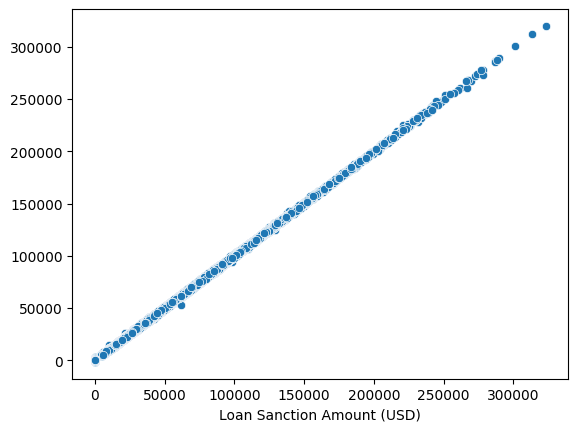

In [180]:
sns.scatterplot(x=y_train, y=pred_train_1)
plt.show()

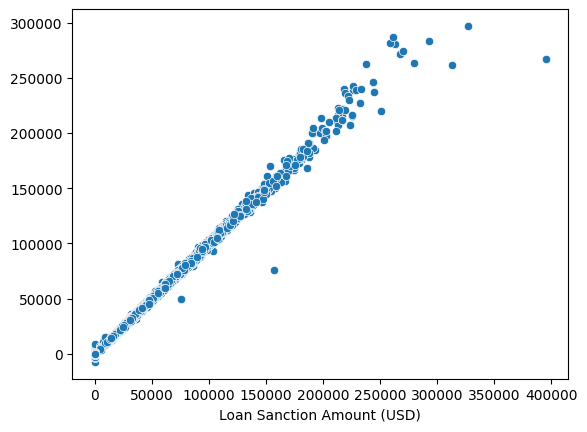

In [181]:
sns.scatterplot(x=y_val, y=pred_val_1)
plt.show()

## 복합 모델링

In [182]:
# 대출이 됬는가 안됬는가
train['target'] = (train['Loan Sanction Amount (USD)'] == 0).astype('int')

In [183]:
# X (피처 데이터), y (다중 타겟 값 포함)
X = train.drop(['Loan Sanction Amount (USD)', 'target'], axis=1)
y = train[['Loan Sanction Amount (USD)', 'target']]  # 다중 열 선택

# 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=100)

In [184]:
# LGB 분류 모델
lgb_c = lgbm.LGBMClassifier(random_state = 100, verbose=-1)

In [185]:
# 랜덤 그리드 서치
rand_2 = RandomizedSearchCV(lgb_c, params,
                            n_iter = 50, cv = 5,
                            random_state = 100,
                            scoring='roc_auc')

rand_2.fit(X_train, y_train['target'])

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(random_state=100, verbose=-1),
                   n_iter=50,
                   param_distributions={'bagging_fraction': [0.5, 0.8, 1],
                                        'feature_fraction': [0.8, 0.9, 1],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.5],
                                        'max_depth': [-1, 30, 50, 100],
                                        'n_estimators': [100, 500, 1000],
                                        'num_leaves': [5, 10, 20, 50]},
                   random_state=100, scoring='roc_auc')

In [186]:
# 최적의 파라미터
rand_2.best_params_

{'num_leaves': 50,
 'n_estimators': 100,
 'max_depth': 50,
 'learning_rate': 0.01,
 'feature_fraction': 0.8,
 'bagging_fraction': 0.5}

In [187]:
lgb_c = lgbm.LGBMClassifier(random_state = 100, **rand_2.best_params_, verbose=-1)
lgb_c

LGBMClassifier(bagging_fraction=0.5, feature_fraction=0.8, learning_rate=0.01,
               max_depth=50, num_leaves=50, random_state=100, verbose=-1)

In [188]:
# 모델 학습
lgb_c.fit(X_train, y_train['target'])
temp_pred = lgb_c.predict(X_val)

In [189]:
from sklearn.metrics import accuracy_score

accuracy_score(y_val['target'], temp_pred)

1.0

#### proba 확률 가져오기

In [190]:
proba_train =lgb_c.predict_proba(X_train)[:, 1]
proba_val = lgb_c.predict_proba(X_val)[:, 1]

#### 정확도가 가장 높은 proba 출력

In [191]:
# proba_train은 예측 확률이므로, arange로 실수 범위를 사용
for i in np.arange(0.2, 0.9, 0.1):
    temp_pred = (proba_train > i).astype(int)  # 임계값 i를 기준으로 예측을 이진 분류로 변환
    print(f'{round(i,2)} :', accuracy_score(y_train['target'], temp_pred))

0.2 : 1.0
0.3 : 1.0
0.4 : 1.0
0.5 : 1.0
0.6 : 1.0
0.7 : 1.0
0.8 : 0.7027731840732732


In [192]:
for i in np.arange(0.2, 0.9, 0.1):
  temp_pred = (proba_val > i).astype(int)
  print(f'{round(i,2)} :', accuracy_score(y_val['target'], temp_pred))

0.2 : 1.0
0.3 : 1.0
0.4 : 1.0
0.5 : 1.0
0.6 : 1.0
0.7 : 1.0
0.8 : 0.7066904095649962


In [193]:
# 0.6으로 설정
proba_train = (proba_train > 0.6).astype(int)
proba_val = (proba_val > 0.6).astype(int)

In [194]:
proba_train = pd.DataFrame(proba_train, index = X_train.index).rename({0:'class'}, axis=1)
proba_val = pd.DataFrame(proba_val, index = X_val.index).rename({0:'class'}, axis=1)

In [195]:
train_approved_index = proba_train[proba_train['class']==0].index
val_approved_index = proba_val[proba_val['class']==0].index

In [196]:
X_train_app = X_train.loc[train_approved_index]
X_val_app = X_val.loc[val_approved_index]

In [197]:
y_train_app = y_train.loc[train_approved_index]
y_val_app = y_val.loc[val_approved_index]

In [198]:
from lightgbm import LGBMRegressor
lgb_r = LGBMRegressor(random_state = 100, verbose = -1)

In [199]:
rand_3 = RandomizedSearchCV(lgb_r, params, n_iter = 50, cv = 5, random_state = 100)
rand_3.fit(X_train_app, y_train_app['Loan Sanction Amount (USD)'])

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(random_state=100, verbose=-1),
                   n_iter=50,
                   param_distributions={'bagging_fraction': [0.5, 0.8, 1],
                                        'feature_fraction': [0.8, 0.9, 1],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.5],
                                        'max_depth': [-1, 30, 50, 100],
                                        'n_estimators': [100, 500, 1000],
                                        'num_leaves': [5, 10, 20, 50]},
                   random_state=100)

In [200]:
rand_3.best_params_

{'num_leaves': 20,
 'n_estimators': 1000,
 'max_depth': -1,
 'learning_rate': 0.1,
 'feature_fraction': 1,
 'bagging_fraction': 0.5}

In [201]:
lgb_r = LGBMRegressor(random_state = 100, **rand_3.best_params_, verbose = -1)

In [202]:
lgb_r.fit(X_train_app, y_train_app['Loan Sanction Amount (USD)'])

LGBMRegressor(bagging_fraction=0.5, feature_fraction=1, n_estimators=1000,
              num_leaves=20, random_state=100, verbose=-1)

In [203]:
pred_train_reg = lgb_r.predict(X_train_app)
pred_val_reg = lgb_r.predict(X_val_app)

In [204]:
pred_train_reg = pd.Series(pred_train_reg, index= X_train_app.index).rename('reg')
pred_val_reg = pd.Series(pred_val_reg, index= X_val_app.index).rename('reg')

In [205]:
pred_train_reg

,reg
19160,68456.259778
23522,60644.774209
2196,93253.194998
10641,98674.984036
19151,137211.690621
...,...
5992,55116.304922
18675,36225.995600
2462,26817.881617
10715,19660.168808


In [206]:
final_pred_train = proba_train.join(pred_train_reg)
final_pred_val = proba_val.join(pred_val_reg)

In [207]:
final_pred_train = final_pred_train.apply(lambda x : x['reg'] if x['class'] == 0 else 0, axis=1)
final_pred_val = final_pred_val.apply(lambda x : x['reg'] if x['class'] == 0 else 0, axis=1)

In [208]:
final_rmse_train =mean_squared_error(y_train['Loan Sanction Amount (USD)'], final_pred_train, squared=False)

In [209]:
final_rmse_val = mean_squared_error(y_val['Loan Sanction Amount (USD)'], final_pred_val, squared=False)

In [210]:
eval = pd.DataFrame(columns = ['train', 'val'])
eval.loc['simple'] = [rmse_train_1, rmse_val_1]
eval

,train,val
simple,558.41102,3267.613415


In [211]:
eval.loc['comb'] = [final_rmse_train, final_rmse_val]

In [212]:
eval

,train,val
simple,558.411020,3267.613415
comb,383.585829,2820.110559


In [213]:
final_pred_train.min()

0.0

In [214]:
with open('/content/drive/MyDrive/머신러닝 프로젝트/data/lgb_c.pkl', 'wb') as f:
  pickle.dump(lgb_c, f)

In [215]:
with open('/content/drive/MyDrive/머신러닝 프로젝트/data/lgb_r.pkl', 'wb') as f:
  pickle.dump(lgb_r, f)